<a href="https://colab.research.google.com/github/OoMyGit/Data-Mining/blob/main/Kwandy_0706022210001_Week6_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mengimpor library Pandas untuk memanipulasi dan menganalisis data dalam bentuk DataFrame.
import pandas as pd
# Mengimpor library NumPy untuk melakukan komputasi numerik dan operasi pada array multidimensi.
import numpy as np
# Mengimpor modul pyplot dari Matplotlib untuk membuat visualisasi grafis seperti grafik, plot, dan diagram.
import matplotlib.pyplot as plt
# Mengimpor library Seaborn untuk membuat visualisasi data statistik yang lebih estetis dan mudah digunakan.
import seaborn as sns
# Mengimpor LabelEncoder dari scikit-learn untuk mengubah data kategorikal menjadi representasi numerik.
from sklearn.preprocessing import LabelEncoder
# Mengimpor fungsi train_test_split dari scikit-learn untuk membagi dataset menjadi set pelatihan dan pengujian.
from sklearn.model_selection import train_test_split
# Mengimpor DecisionTreeClassifier dari scikit-learn untuk membuat model klasifikasi berbasis Decision Tree.
from sklearn.tree import DecisionTreeClassifier
# Mengimpor metrik evaluasi seperti accuracy_score, confusion_matrix, dan classification_report untuk mengukur kinerja model.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Mengimpor modul tree dari scikit-learn untuk bekerja dengan model decision tree, termasuk visualisasi Tree.
from sklearn import tree
# Mengimpor Gaussian Naive Bayes dari scikit-learn untuk membangun model klasifikasi berbasis Naive Bayes dengan distribusi Gaussian.
from sklearn.naive_bayes import GaussianNB
# Mengimpor Random Forest dari scikit-learn untuk membangun model klasifikasi berbasis Random Forest.
from sklearn.ensemble import RandomForestClassifier

In [2]:
#1
# Mengambil dataset dari URL menggunakan Pandas dan membacanya sebagai DataFrame dengan pemisah koma (',').

# url = "https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining-W6/refs/heads/main/diabetes.csv"
url = "https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining-W6/refs/heads/main/breast-cancer.csv"
# url = "https://raw.githubusercontent.com/OoMyGit/Dataset-DataMining-W6/refs/heads/main/adult.csv"
df = pd.read_csv(url, delimiter=',')
# Menampilkan 10 sampel acak dari DataFrame untuk mendapatkan gambaran umum tentang data.
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
471,9113816,B,12.04,28.14,76.85,449.9,0.08752,0.06000,0.023670,0.023770,...,13.600,33.33,87.24,567.6,0.10410,0.09726,0.05524,0.05547,0.2404,0.06639
137,868682,B,11.43,15.39,73.06,399.8,0.09639,0.06889,0.035030,0.028750,...,12.320,22.02,79.93,462.0,0.11900,0.16480,0.13990,0.08476,0.2676,0.06765
334,897374,B,12.30,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,...,13.350,28.46,84.53,544.3,0.12220,0.09052,0.03619,0.03983,0.2554,0.07207
377,9013579,B,13.46,28.21,85.89,562.1,0.07517,0.04726,0.012710,0.011170,...,14.690,35.63,97.11,680.6,0.11080,0.14570,0.07934,0.05781,0.2694,0.07061
294,891716,B,12.72,13.78,81.78,492.1,0.09667,0.08393,0.012880,0.019240,...,13.500,17.48,88.54,553.7,0.12980,0.14720,0.05233,0.06343,0.2369,0.06922
462,9113156,B,14.40,26.99,92.25,646.1,0.06995,0.05223,0.034760,0.017370,...,15.400,31.98,100.40,734.6,0.10170,0.14600,0.14720,0.05563,0.2345,0.06464
192,875099,B,9.72,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559
149,869931,B,13.74,17.91,88.12,585.0,0.07944,0.06376,0.028810,0.013290,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
204,87930,B,12.47,18.60,81.09,481.9,0.09965,0.10580,0.080050,0.038210,...,14.970,24.64,96.05,677.9,0.14260,0.23780,0.26710,0.10150,0.3014,0.08750
419,906290,B,11.16,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.010760,...,12.360,28.92,79.26,458.0,0.12820,0.11080,0.03582,0.04306,0.2976,0.07123


In [3]:
#2
# Menampilkan informasi ringkas tentang DataFrame, termasuk jumlah entri,
# jumlah non-null, tipe data tiap kolom, dan penggunaan memori.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
#3
# Menampilkan statistik deskriptif untuk kolom numerik dalam DataFrame,
# termasuk jumlah, rata-rata, standar deviasi, nilai minimum, dan persentil.
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
#4
# Menghitung jumlah kemunculan setiap spesies dalam kolom 'diagnosis', termasuk nilai NaN (jika ada).
diagnosis_counts = df['diagnosis'].value_counts(dropna=False)

#Display Result
diagnosis_counts

,count
diagnosis,
B,357
M,212


In [7]:
# Check for any remaining missing values
df_cleaned = df.isnull().sum()

# Display the result
df_cleaned

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


<ipython-input-38-867e7d512fca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


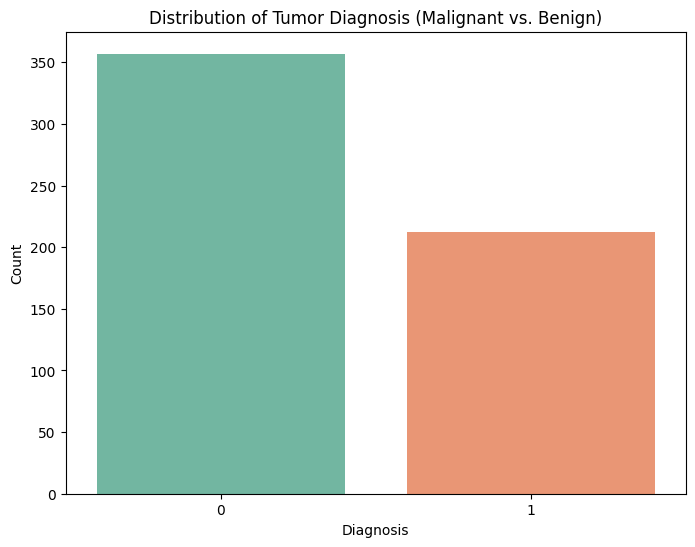

In [38]:
# Visualization 1: Diagnosis Count Distribution

# Mengatur ukuran figur menggunakan plt.figure untuk memastikan plot memiliki dimensi yang sesuai (8x6).
plt.figure(figsize=(8, 6))

# Membuat plot jumlah (count plot) dengan Seaborn untuk melihat distribusi data diagnosis pada dataset df.
# Argumen x='diagnosis' menentukan bahwa sumbu x akan diwakili oleh variabel 'diagnosis', sementara data=df menetapkan sumber datanya.
# Parameter palette='Set2' menyesuaikan palet warna agar lebih estetis.
sns.countplot(x='diagnosis', data=df, palette='Set2')

# Menambahkan judul pada grafik untuk menjelaskan bahwa grafik ini menunjukkan distribusi diagnosis tumor (Malignant vs. Benign).
plt.title("Distribution of Tumor Diagnosis (Malignant vs. Benign)")

# Menambahkan label pada sumbu x untuk menunjukkan bahwa ini adalah diagnosis tumor.
plt.xlabel("Diagnosis")

# Menambahkan label pada sumbu y untuk menunjukkan jumlah (count) dari setiap kategori diagnosis.
plt.ylabel("Count")

# Menampilkan grafik yang sudah dibuat dengan plt.show().
plt.show()

# This bar chart illustrates the distribution of malignant (M) and benign (B)
# diagnoses within the dataset. The chart reveals a larger number of benign cases
# compared to malignant ones, highlighting the overall dataset composition.
# This distribution is important for understanding class balance, which impacts
# the effectiveness of predictive models trained on this data.

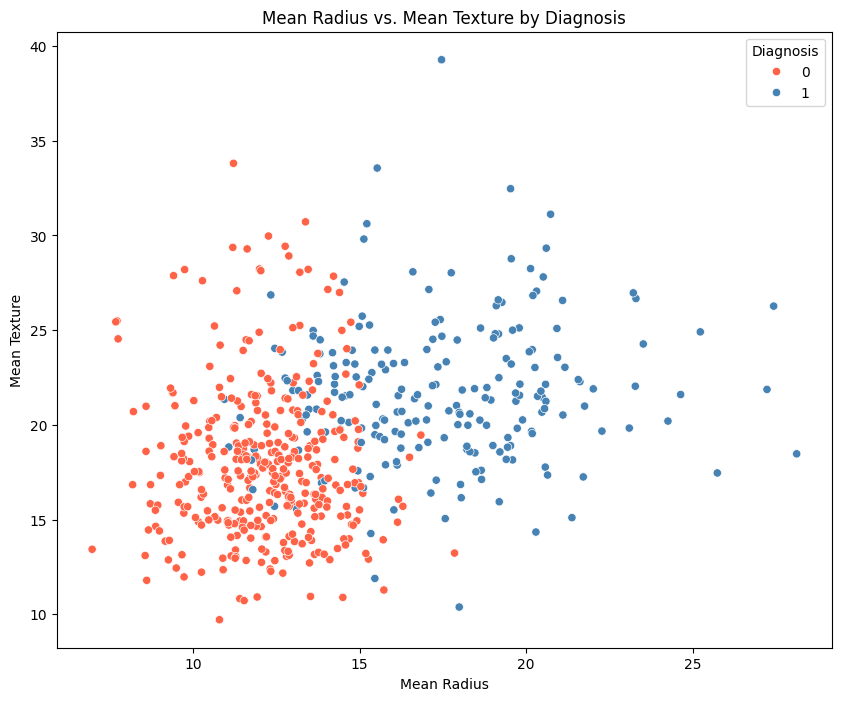

In [39]:
# 2. Mean Radius vs Mean Texture by Diagnosis

# Mengatur ukuran figur menggunakan plt.figure untuk memastikan plot memiliki dimensi yang sesuai (10x8).
plt.figure(figsize=(10, 8))

# Membuat scatter plot (plot sebar) dengan Seaborn untuk memvisualisasikan hubungan antara radius_mean dan texture_mean berdasarkan diagnosis.
# Argumen x='radius_mean' dan y='texture_mean' menentukan variabel yang diplot pada sumbu x dan y.
# Parameter hue='diagnosis' menambahkan warna yang berbeda untuk setiap kategori diagnosis, sehingga membedakan kategori diagnosis yang berbeda.
# Parameter data=df menetapkan sumber data yang digunakan, dan palette=['#FF6347', '#4682B4'] menyesuaikan warna plot untuk setiap kategori.
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=df, palette=['#FF6347', '#4682B4'])

# Menambahkan judul pada grafik untuk menjelaskan bahwa grafik ini menunjukkan hubungan antara Mean Radius dan Mean Texture berdasarkan Diagnosis.
plt.title('Mean Radius vs. Mean Texture by Diagnosis')

# Menambahkan label pada sumbu x untuk menunjukkan bahwa ini adalah nilai rata-rata dari radius (Mean Radius).
plt.xlabel('Mean Radius')

# Menambahkan label pada sumbu y untuk menunjukkan bahwa ini adalah nilai rata-rata dari tekstur (Mean Texture).
plt.ylabel('Mean Texture')

# Menampilkan legenda dengan judul 'Diagnosis' agar pengguna dapat memahami arti warna yang digunakan pada plot.
plt.legend(title='Diagnosis')

# Menampilkan grafik yang sudah dibuat dengan plt.show().
plt.show()

# The scatter plot illustrates the relationship between mean radius and mean
# texture for both benign and malignant tumors. We observe a tendency for
# malignant tumors to have higher radius and texture values, which could suggest
# that larger and more textured tumors are often malignant, aiding in
# distinguishing between the two types. ​

In [8]:
#7
# Mengambil nilai unik dari kolom diagnosis untuk mengetahui yang terdapat dalam DataFrame.
unique_diagnosis = df['diagnosis'].unique()
# Menampilkan array diagnosis unique yang ditemukan dalam dataset.
print(unique_diagnosis)

['M' 'B']


In [9]:
#8
# Membuat objek LabelEncoder untuk mengubah data kategorikal menjadi numerik.
label_encoder = LabelEncoder()

# Mengubah kolom menjadi representasi numerik menggunakan LabelEncoder.
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
# Menampilkan 5 sampel acak dari DataFrame setelah pengkodean.
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
288,8913049,0,11.260,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.05588,...,11.86,22.33,78.27,437.6,0.1028,0.1843,0.1546,0.09314,0.2955,0.07009
240,88350402,0,13.640,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,...,14.85,19.05,94.11,683.4,0.1278,0.1291,0.1533,0.09222,0.2530,0.06510
193,875263,1,12.340,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,...,15.65,39.34,101.70,768.9,0.1785,0.4706,0.4425,0.14590,0.3215,0.12050
500,914862,0,15.040,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.06142,...,16.76,20.43,109.70,856.9,0.1135,0.2176,0.1856,0.10180,0.2177,0.08549
391,903483,0,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,...,10.17,22.80,64.01,317.0,0.1460,0.1310,0.0000,0.00000,0.2445,0.08865


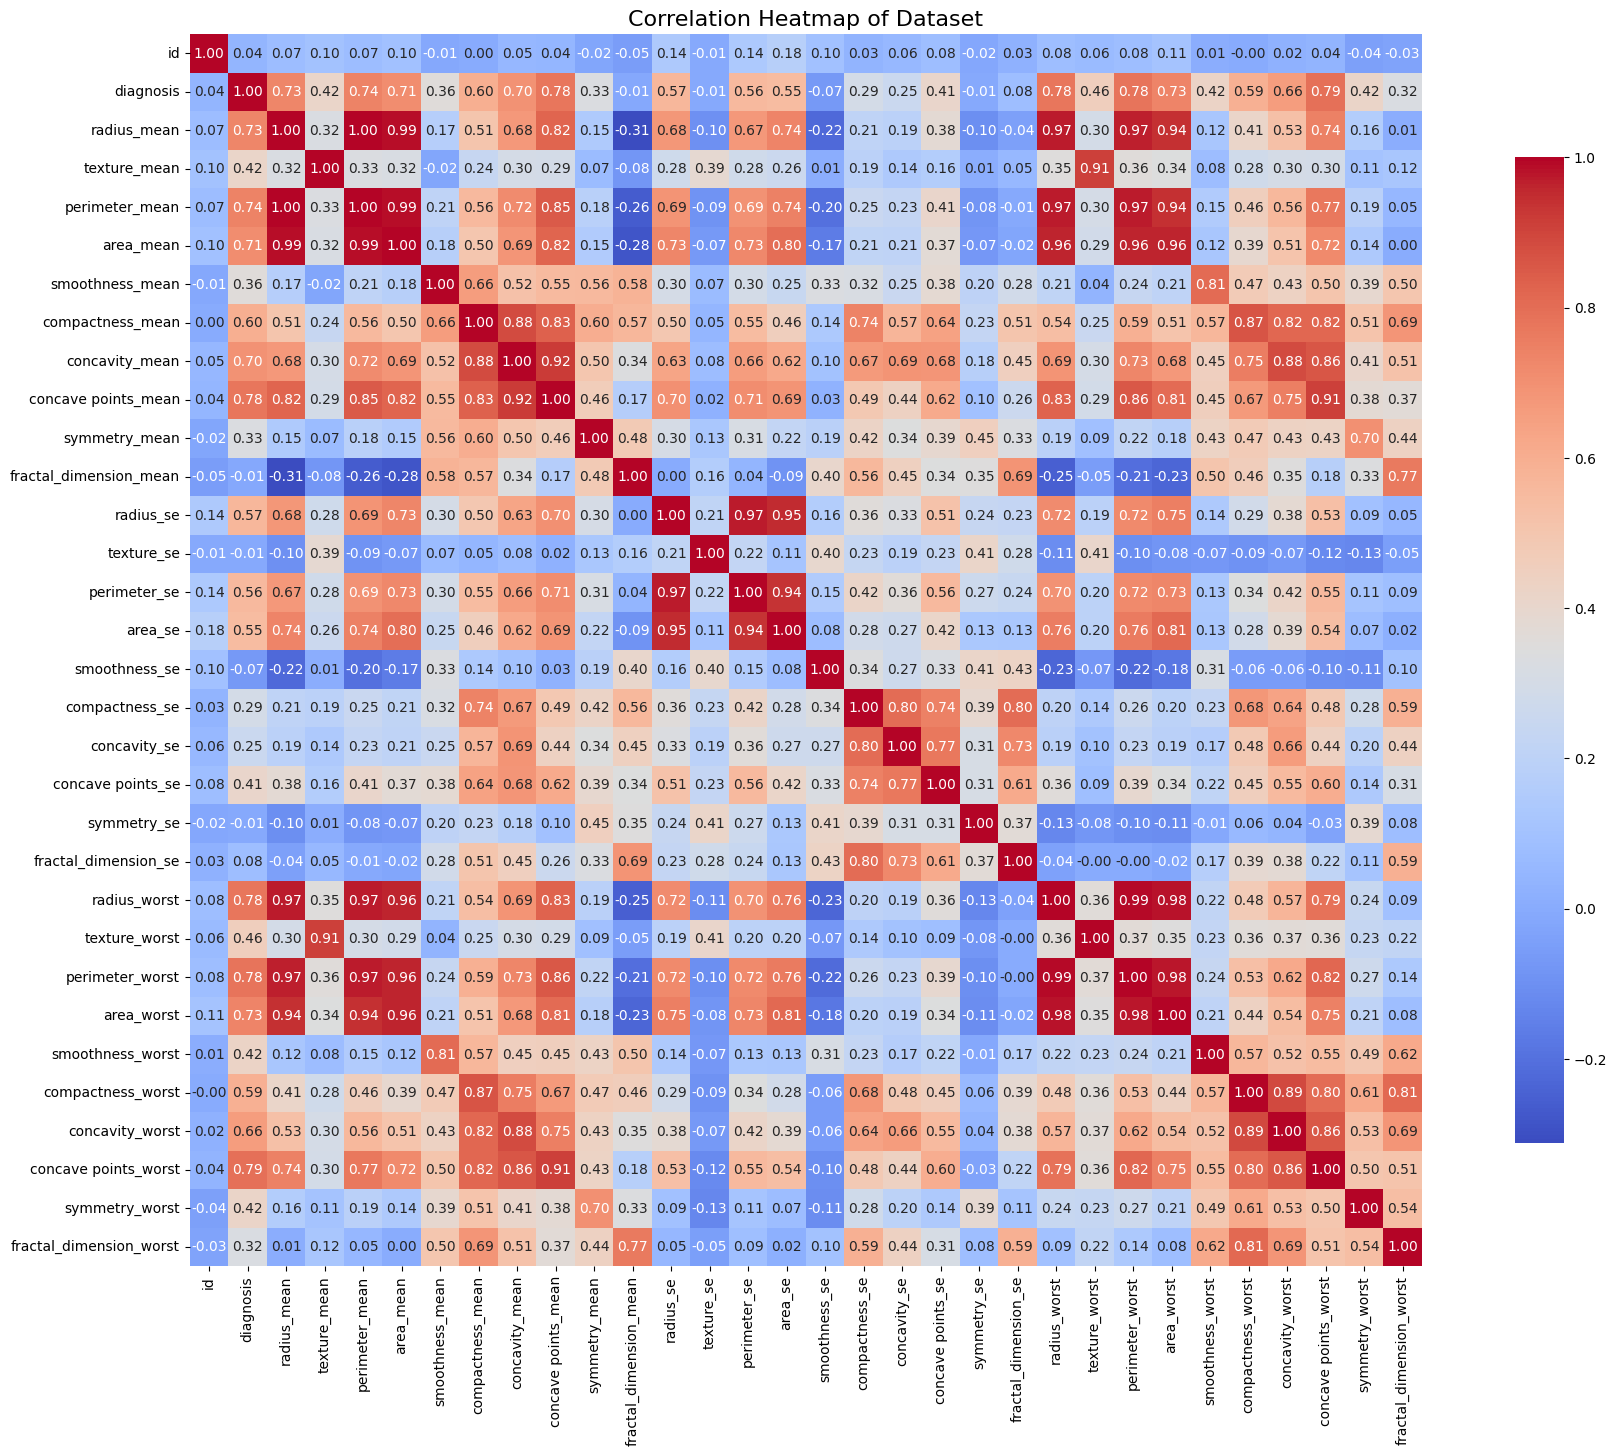

In [11]:
#10
# Menghitung matriks korelasi untuk DataFrame untuk melihat hubungan antara fitur-fitur numerik.
correlation_matrix = df.corr()

# Mengatur ukuran figure untuk visualisasi heatmap.
plt.figure(figsize=(24, 16))
# Membuat heatmap untuk matriks korelasi dengan anotasi nilai korelasi, menggunakan palet warna 'coolwarm'.
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Menambahkan judul pada heatmap.
plt.title('Correlation Heatmap of Dataset', fontsize=16)
# Menampilkan heatmap.
plt.show()

# Conclusion
# This heatmap visualizes the correlation between different numerical features in
# the dataset. Each cell represents the correlation coefficient between two features,
# ranging from -1 (strong negative correlation) to 1 (strong positive correlation),
# with darker shades indicating stronger relationships. For example,
# "radius_mean" is highly positively correlated with "perimeter_mean" (0.99) and
# "area_mean" (0.98), suggesting that these features are likely measuring similar
# aspects. High correlations, especially among features like those ending in
# "_mean," "_se," and "_worst," indicate possible redundancy, meaning they may
# carry overlapping information. Redundant features can impact certain machine
# learning models by introducing multicollinearity, so dimensionality reduction or
# feature selection could help in simplifying the dataset while retaining essential
# information. This heatmap provides a concise overview, helping to identify
# groups of related features and informing decisions on feature engineering.

In [12]:
#1
# Menghapus kolom 'diagnosis' dari DataFrame untuk membentuk fitur (X) yang akan digunakan dalam model.
X = df.drop(columns=['diagnosis'])
# Menetapkan kolom 'diagnosis' sebagai target variabel (y) yang akan diprediksi oleh model.
y = df['diagnosis']

In [13]:
#2
# Membagi dataset menjadi set pelatihan (80%) dan set pengujian (20%) dengan menggunakan fungsi train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#3
# Menampilkan dimensi dari set pelatihan (X_train) untuk mengetahui jumlah sampel dan fitur yang ada.
print(X_train.shape)
# Menampilkan dimensi dari set pengujian (X_test) untuk mengetahui jumlah sampel dan fitur yang ada.
print(X_test.shape)

(455, 31)
(114, 31)


Decision Tree

In [15]:
#Criterion Entropy
#a
# Membuat model Decision Tree Classifier dengan kriteria pemisahan 'entropy', kedalaman maksimum 3, dan seed acak 0.
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Melatih model menggunakan data pelatihan (X_train dan y_train).
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [16]:
#Criterion Gini
#a
# Membuat model Decision Tree Classifier dengan kriteria pemisahan 'gini', kedalaman maksimum 3, dan seed acak 0.
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Melatih model menggunakan data pelatihan (X_train dan y_train).
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [17]:
#b
# Menggunakan model Decision Tree yang dilatih untuk memprediksi kelas target pada set pengujian (X_test).
y_pred_entropy = dt_entropy.predict(X_test)

In [18]:
#b
# Menggunakan model Decision Tree yang dilatih untuk memprediksi kelas target pada set pengujian (X_test).
y_pred_gini = dt_gini.predict(X_test)

In [19]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_entropy) dengan nilai sebenarnya (y_test).
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
# Menampilkan skor akurasi model dengan format 4 desimal.
print(f"Model accuracy score with criterion entropy: {accuracy_entropy:.4f}")

Model accuracy score with criterion entropy: 0.9561


In [20]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_gini) dengan nilai sebenarnya (y_test).
accuracy_gini = accuracy_score(y_test, y_pred_gini)
# Menampilkan skor akurasi model dengan format 4 desimal.
print(f"Model accuracy score with criterion Gini Index: {accuracy_gini:.4f}")

Model accuracy score with criterion Gini Index: 0.9386


In [21]:
#d
# Menghitung skor akurasi untuk set pelatihan menggunakan model Decision Tree.
train_score_entropy = dt_entropy.score(X_train, y_train)
# Menyimpan skor akurasi untuk set pengujian dari akurasi model sebelumnya.
test_score_entropy = accuracy_entropy

# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_entropy:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_entropy:.4f}")

Training set score: 0.9934
Test set score: 0.9561


In [22]:
#d
# Menghitung skor akurasi untuk set pelatihan menggunakan model Decision Tree.
train_score_gini = dt_gini.score(X_train, y_train)
# Menyimpan skor akurasi untuk set pengujian dari akurasi model sebelumnya.
test_score_gini = accuracy_gini

# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_gini:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_gini:.4f}")

Training set score: 0.9956
Test set score: 0.9386


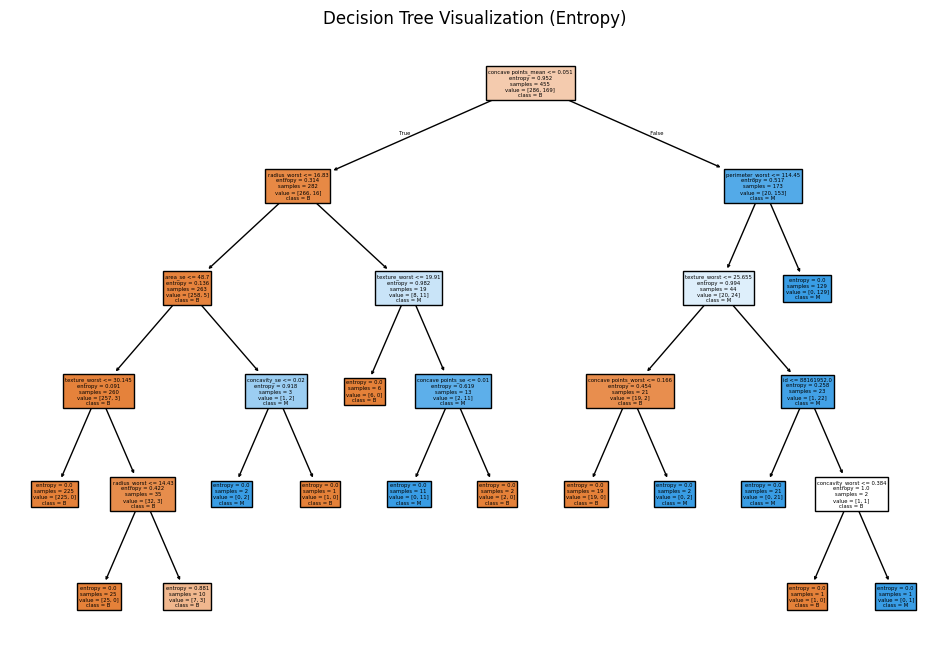

In [23]:
#e
# Mengatur ukuran figure untuk visualisasi Decision Tree.
plt.figure(figsize=(12, 8))
# Menggambar pohon keputusan dari model Decision Tree yang dilatih dengan nama fitur dan kelas spesies.
tree.plot_tree(dt_entropy, feature_names=X.columns, class_names=['B','M'], filled=True)
# Menambahkan judul pada visualisasi Decision Tree.
plt.title("Decision Tree Visualization (Entropy)")
# Menampilkan visualisasi Decision Tree.
plt.show()

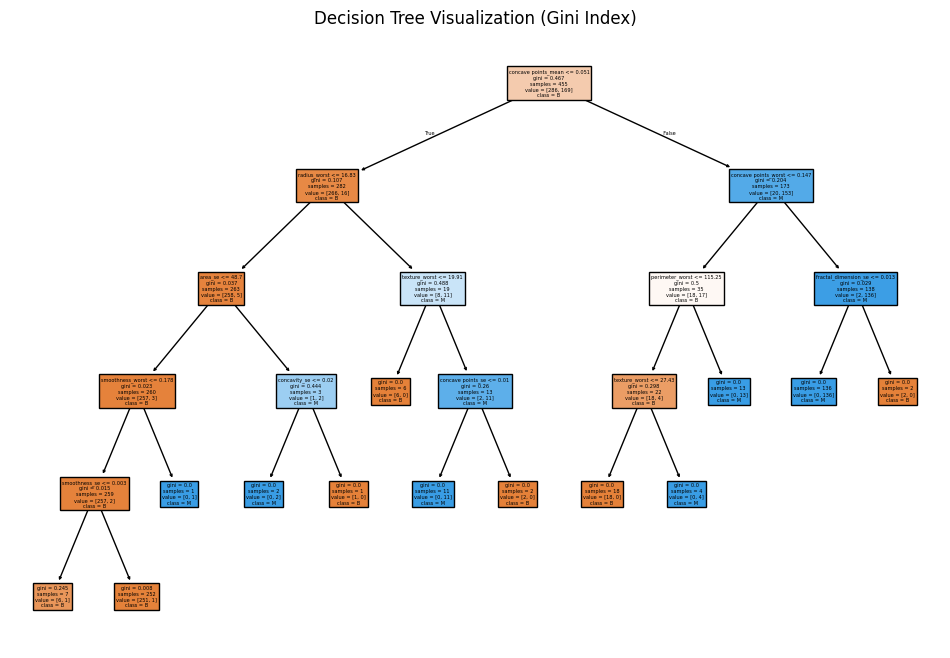

In [24]:
#e
# Mengatur ukuran figure untuk visualisasi Decision Tree.
plt.figure(figsize=(12, 8))
# Menggambar pohon dari model Decision Tree yang dilatih dengan nama fitur dan kelas spesies.
tree.plot_tree(dt_gini, feature_names=X.columns, class_names=['B','M'], filled=True)
# Menambahkan judul pada visualisasi Decision Tree.
plt.title("Decision Tree Visualization (Gini Index)")
# Menampilkan visualisasi Decision Tree.
plt.show()

In [25]:
#f
# Menghitung matriks kebingungan untuk model dengan kriteria 'entropy' dengan membandingkan nilai prediksi (y_pred_entropy) dan nilai sebenarnya (y_test).
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
# Menghitung matriks kebingungan untuk model dengan kriteria 'gini' dengan membandingkan nilai prediksi (y_pred_gini) dan nilai sebenarnya (y_test).
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

# Menampilkan matriks kebingungan untuk model dengan kriteria 'entropy'.
print("Confusion Matrix Entropy:\n", conf_matrix_entropy)
# Menampilkan matriks kebingungan untuk model dengan kriteria 'gini'.
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

Confusion Matrix Entropy:
 [[70  1]
 [ 4 39]]
Confusion Matrix Gini Index:
 [[68  3]
 [ 4 39]]


In [26]:
#g
# Menghitung laporan klasifikasi untuk model dengan kriteria 'entropy' yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_entropy = classification_report(y_test, y_pred_entropy)
# Menghitung laporan klasifikasi untuk model dengan kriteria 'gini' yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_gini = classification_report(y_test, y_pred_gini)

# Menampilkan laporan klasifikasi untuk model dengan kriteria 'entropy'.
print("Classification Report Entropy:\n", class_report_entropy)
# Menampilkan laporan klasifikasi untuk model dengan kriteria 'gini'.
print("Classification Report Gini Index:\n", class_report_gini)

Classification Report Entropy:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Classification Report Gini Index:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



Gaussian Naive Bayes

In [27]:
#a
# Membuat model Gaussian Naive Bayes.
nb = GaussianNB()
# Melatih model menggunakan data pelatihan (X_train dan y_train).
nb.fit(X_train, y_train)

GaussianNB()

In [28]:
#b
# Menggunakan model Gaussian Naive Bayes yang dilatih untuk memprediksi kelas target ada set pengujian (X_test).
y_pred_nb = nb.predict(X_test)

In [29]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_nb) dengan nilai sebenarnya (y_test).
test_score_nb = accuracy_score(y_test, y_pred_nb)
# Menghitung skor akurasi untuk set pelatihan menggunakan model GaussianNB.
train_score_nb = nb.score(X_train, y_train)
# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_nb:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_nb:.4f}")

#d
# Menghitung matriks kebingungan untuk model Gaussian Naive Bayes dengan membandingkan nilai prediksi (y_pred_nb) dan nilai sebenarnya (y_test).
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
# Menampilkan matriks kebingungan untuk model Gaussian Naive Bayes.
print("Confusion Matrix:\n", conf_matrix_nb)

Training set score: 0.6286
Test set score: 0.6140
Confusion Matrix:
 [[70  1]
 [43  0]]


In [30]:
#e
# Menghitung laporan klasifikasi untuk model Gaussian Naive Bayes yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_nb = classification_report(y_test, y_pred_nb)
# Menampilkan laporan klasifikasi untuk model Gaussian Naive Bayes.
print("Classification Report:\n", class_report_nb)

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.99      0.76        71
           1       0.00      0.00      0.00        43

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.47       114



Random Forest

In [31]:
#a
# Membuat model Random Forest.
rf = RandomForestClassifier(n_estimators=100, random_state=0)
# Melatih model menggunakan data pelatihan (X_train dan y_train).
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [32]:
#b
# Menggunakan model Random Forest yang dilatih untuk memprediksi kelas target pada set pengujian (X_test).
y_pred_rf = rf.predict(X_test)

In [33]:
#c
# Menghitung akurasi model dengan membandingkan nilai prediksi (y_pred_rf) dengan nilai sebenarnya (y_test).
test_score_rf = accuracy_score(y_test, y_pred_rf)
# Menghitung skor akurasi untuk set pelatihan menggunakan model Random Forest.
train_score_rf = rf.score(X_train, y_train)
# Menampilkan skor akurasi untuk set pelatihan dengan format 4 desimal.
print(f"Training set score: {train_score_rf:.4f}")
# Menampilkan skor akurasi untuk set pengujian dengan format 4 desimal.
print(f"Test set score: {test_score_rf:.4f}")

#d
# Menghitung matriks kebingungan untuk model Random Forest dengan membandingkan nilai prediksi (y_pred_rf) dan nilai sebenarnya (y_test).
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# Menampilkan matriks kebingungan untuk model Random Forest.
print("Confusion Matrix:\n", conf_matrix_rf)

Training set score: 1.0000
Test set score: 0.9649
Confusion Matrix:
 [[70  1]
 [ 3 40]]


In [34]:
#e
# Menghitung laporan klasifikasi untuk model Random Forest yang mencakup metrik seperti precision, recall, dan F1-score.
class_report_rf = classification_report(y_test, y_pred_rf)
# Menampilkan laporan klasifikasi untuk model Random Forest.
print("Classification Report:\n", class_report_rf)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

